https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews



# **1️⃣Presentación Proyecto Final Data Science III**

## **Abstracto**

El presente proyecto de ciencia de datos consiste en un análisis de sentimiento. Para ello, se utilizó un conjunto de datos de una empresa de comercio electrónico de moda femenina que contiene 23 486 reseñas. A partir de estas, se construyó un modelo que determina si un cliente recomendará un producto en función del texto de su reseña. Para ello, se emplearon técnicas de procesamiento de lenguaje natural y machine learning para procesar el texto y desarrollar un modelo predictivo robusto.

**Motivación**

En el competitivo mercado del comercio electrónico, comprender la satisfacción del cliente es fundamental. El análisis de reseñas proporciona a las empresas información valiosa para mejorar sus productos y servicios. La automatización de este proceso mediante un modelo de aprendizaje automático es una herramienta poderosa que permite ampliar el análisis y tomar decisiones basadas en datos de manera eficiente.

**Audiencia**

Este trabajo está dirigido a gerentes de producto, equipos de marketing y analistas de datos de la industria minorista y del comercio electrónico. Los resultados obtenidos y el modelo desarrollado pueden utilizarse para identificar problemas en los productos, medir el impacto de las campañas de marketing y optimizar la experiencia del cliente.

##**Contexto Comercial y Analítico**

* Comercial: Se busca comprender las razones detrás de la recomendación o no recomendación de los productos para mejorar la calidad, el diseño y la estrategia de marketing. El objetivo es convertir las reseñas de texto libre en información accionable.

* Analítico: El proyecto se aborda como un problema de clasificación binaria. La variable objetivo es Recommended IND (1 = recomendado, 0 = no recomendado), y la variable predictora es Review Text.

##**Objetivo**

El objetivo principal es desarrollar un modelo de clasificación que prediga la variable Recommended IND a partir del texto de la reseña. Además, se busca identificar las palabras y frases más influyentes en la decisión del cliente, proporcionando información valiosa para la empresa.

##**Pregunta**

* ¿Podemos predecir con alta precisión si un cliente recomendará un producto basándonos únicamente en el texto de su reseña?

##**Hipótesis nula y alternativa**

* Hipótesis nula (H0): el texto de las reseñas de productos, después de ser procesado con técnicas de procesamiento del lenguaje natural y transformado en características numéricas, no es suficiente para predecir si un cliente recomendará o no un producto con una precisión significativamente mayor que la de un modelo ingenuo.

* Hipótesis alternativa (H1): es posible construir un modelo de aprendizaje automático que prediga la variable Recommended IND con una precisión significativamente mayor que la de un modelo ingenuo utilizando las características extraídas del texto de las reseñas de productos. Esperamos alcanzar una precisión general superior al 85 % y un recall para la clase 0 superior al 50 %.


#**2️⃣Lectura de datos**

In [ ]:
# @title Librerías + Recursos
import pandas as pd
import requests
import chardet
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import nltk

# Descargar recursos de NLTK
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title Lectura de CSV
df=pd.read_csv('/content/drive/MyDrive/coder/Data Scientist/Womens Clothing E-Commerce Reviews.csv')

# Seleccionar solo las columnas 'review' y 'rating'
df_fil = df[['Review Text', 'Recommended IND']].copy()

In [ ]:
df_fil.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


# **3️⃣Preprocesamiento de datos + Análisis Exploratorio**

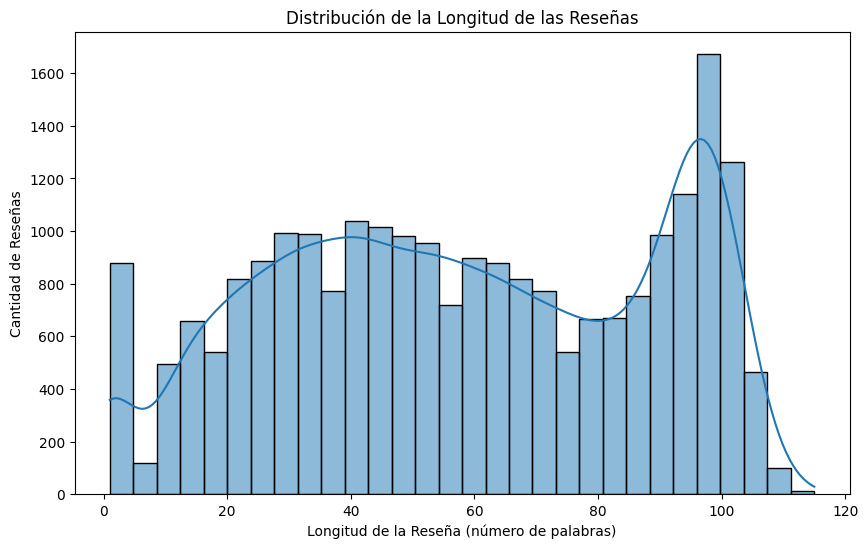

In [ ]:
# @title Distribución de la Longitud de las Reseñas
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Calcular la longitud de la reseña en términos de número de palabras
df_fil['review_length'] = df_fil['Review Text'].apply(lambda x: len(str(x).split()))

# Mostrar la distribución de la longitud de las reseñas
plt.figure(figsize=(10, 6))
sns.histplot(df_fil['review_length'], bins=30, kde=True)
plt.title('Distribución de la Longitud de las Reseñas')
plt.xlabel('Longitud de la Reseña (número de palabras)')
plt.ylabel('Cantidad de Reseñas')
plt.show()

Se observa que a mayoría de las reseñas tienen una longitud de 40 palabras. Esto indica que los clientes tienden a dejar comentarios breves. Luego se observa un segundo pico alrededor de las 100 palabras lo que sugeriría que un grupo considerable de clientes dejas reseñas medianas.

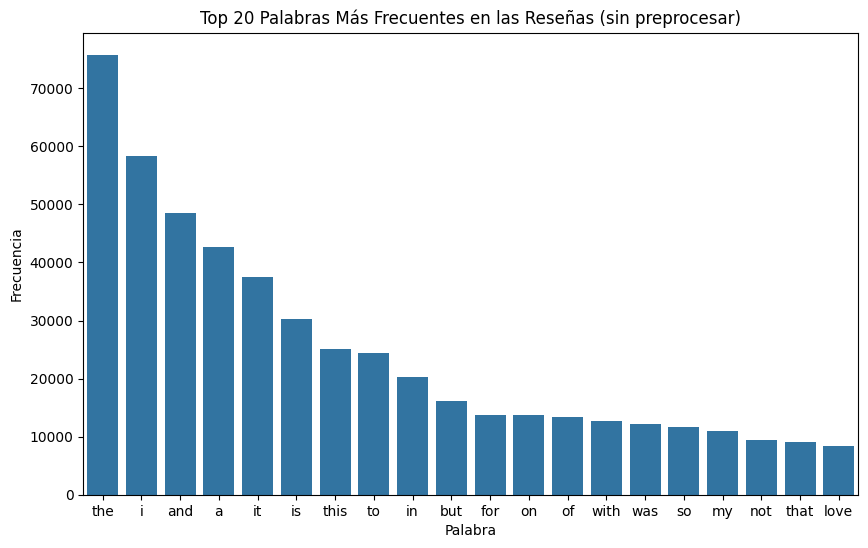

In [ ]:
# @title Análisis de Frecuencia de Palabras y Distribución de Frecuencia
# Contar la frecuencia de cada palabra
all_words = ' '.join(df_fil['Review Text'].astype(str).str.lower()).split()
word_freq = Counter(all_words)
top_20_words = word_freq.most_common(20)

# Convertir la lista de tuplas en un DataFrame para graficar
top_20_df = pd.DataFrame(top_20_words, columns=['Palabra', 'Frecuencia'])

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Palabra', y='Frecuencia', data=top_20_df)
plt.title('Top 20 Palabras Más Frecuentes en las Reseñas (sin preprocesar)')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.show()

La palabra "love" es la más llamativa de todas, se podría considerar como stopword.

In [ ]:
# @title Limpieza de texto, Tokenización y Lematización
# Limpieza del texto
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'[^a-z\s]', '', text)
        return text
    else:
        return "" # Return empty string for non-string values

df_fil['cleaned_review'] = df_fil['Review Text'].apply(clean_text)

# Tokenización
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

df_fil['tokenized_review'] = df_fil['cleaned_review'].apply(tokenize_text)

# Lematización
lemmatizer = WordNetLemmatizer()

def lemmatize_and_remove_stopwords(tokens):
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in ENGLISH_STOP_WORDS]
    return tokens

df_fil['processed_review'] = df_fil['tokenized_review'].apply(lemmatize_and_remove_stopwords)

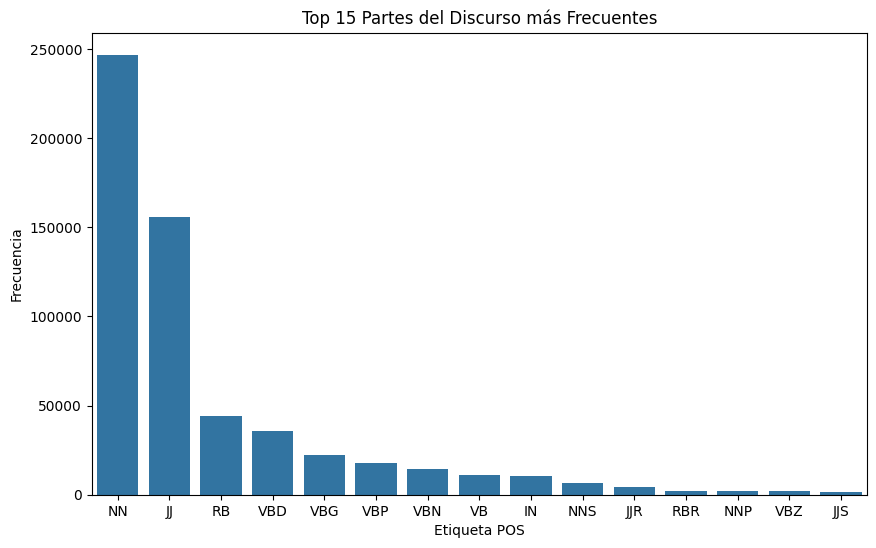

In [ ]:
# @title Análisis Léxico y Morfológico

from nltk import pos_tag

# Definir la función para el POS tagging y filtrado
def pos_tag_filter(tokens):
    tagged_tokens = pos_tag(tokens)
    # Filtrar por sustantivos ('NN'), verbos ('VB') y adjetivos ('JJ')
    filtered_tokens = [word for word, tag in tagged_tokens if tag.startswith('NN') or tag.startswith('VB') or tag.startswith('JJ')]
    return filtered_tokens

# Aplicar la función a la columna 'processed_review'
df_fil['filtered_review'] = df_fil['processed_review'].apply(pos_tag_filter)

# Obtener todas las etiquetas POS para el corpus
# Se usa la columna 'processed_review' que ya tiene el texto limpio y lematizado
all_pos_tags = []
for tokens in df_fil['processed_review']:
    # Usamos nltk.pos_tag para asignar etiquetas de parte del discurso
    tagged_tokens = nltk.pos_tag(tokens)
    # Extraemos solo las etiquetas (ej. 'NN', 'VB', 'JJ')
    pos_tags_in_review = [tag for word, tag in tagged_tokens]
    all_pos_tags.extend(pos_tags_in_review)

# Contar la frecuencia de cada etiqueta
pos_freq = Counter(all_pos_tags)

# Convertir a DataFrame para facilitar la visualización
pos_freq_df = pd.DataFrame(pos_freq.items(), columns=['POS Tag', 'Frecuencia'])

# Ordenar los datos por frecuencia en orden descendente
pos_freq_df = pos_freq_df.sort_values(by='Frecuencia', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='POS Tag', y='Frecuencia', data=pos_freq_df.head(15))
plt.title('Top 15 Partes del Discurso más Frecuentes')
plt.xlabel('Etiqueta POS')
plt.ylabel('Frecuencia')
plt.show()

 Los sustantivos ("NN") y los adjetivos ("JJ") son las partes del discurso más frecuentes. Esto confirma que los clientes tienden a usar sustantivos para referirse a los productos ("dress", "fabric") y adjetivos para calificarlos ("great", "horrible"). La alta frecuencia de los adjetivos es especialmente relevante, ya que son cruciales para determinar el sentimiento de una reseña, lo cual justifica la decisión de incluirlos en el preprocesamiento del modelo.

In [ ]:
# @title Análisis de N-gramas
from collections import Counter
from nltk.util import ngrams

# Unir todos los tokens procesados en una sola cadena de texto para el análisis de n-gramas
all_processed_tokens = [word for tokens in df_fil['processed_review'] for word in tokens]

# --- Análisis de Bigramas (N=2) ---
bigrams = ngrams(all_processed_tokens, 2)
# Contar la frecuencia de cada bigrama
bigram_freq = Counter(bigrams)

# --- Análisis de Trigramas (N=3) ---
trigrams = ngrams(all_processed_tokens, 3)
# Contar la frecuencia de cada trigrama
trigram_freq = Counter(trigrams)

print("Los 10 bigramas más comunes:", bigram_freq.most_common(10))
print("Los 10 trigramas más comunes:", trigram_freq.most_common(10))

Los 10 bigramas más comunes: [(('true', 'size'), 1300), (('fit', 'perfectly'), 1084), (('look', 'great'), 897), (('look', 'like'), 794), (('love', 'dress'), 780), (('usually', 'wear'), 695), (('im', 'lb'), 615), (('fit', 'great'), 590), (('size', 'small'), 546), (('run', 'large'), 538)]
Los 10 trigramas más comunes: [(('fit', 'true', 'size'), 493), (('run', 'true', 'size'), 198), (('love', 'love', 'love'), 142), (('size', 'fit', 'perfectly'), 136), (('usually', 'wear', 'size'), 134), (('small', 'fit', 'perfectly'), 134), (('fit', 'like', 'glove'), 132), (('ordered', 'usual', 'size'), 106), (('doe', 'run', 'large'), 96), (('really', 'wanted', 'love'), 93)]


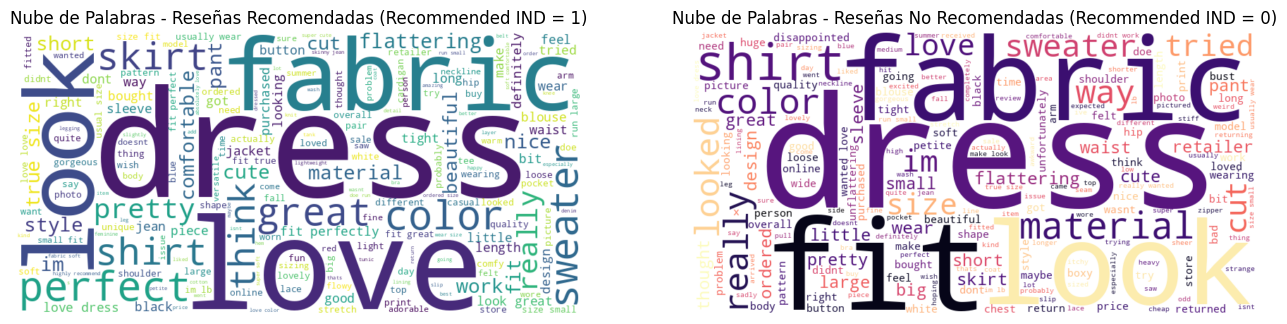

In [ ]:
# @title Nube de palabras

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir en reseñas recomendadas y no recomendadas
recommended_reviews = df_fil[df_fil['Recommended IND'] == 1]['processed_review']
not_recommended_reviews = df_fil[df_fil['Recommended IND'] == 0]['processed_review']

# Unir los tokens procesados en una sola cadena de texto para el análisis de n-gramas
recommended_text = ' '.join([' '.join(tokens) for tokens in recommended_reviews])
not_recommended_text = ' '.join([' '.join(tokens) for tokens in not_recommended_reviews])

# Crear nubes de palabras Recomendado y No Recomendado
recommended_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(recommended_text)
not_recommended_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(not_recommended_text)

# Mostrar nubes de palabras
plt.figure(figsize=(16, 8))

# Subplot para la nube de reseñas recomendadas
plt.subplot(1, 2, 1)
plt.imshow(recommended_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Reseñas Recomendadas (Recommended IND = 1)')

# Subplot para la nube de reseñas no recomendadas
plt.subplot(1, 2, 2)
plt.imshow(not_recommended_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Reseñas No Recomendadas (Recommended IND = 0)')

plt.show()

Observaciones:
* Nube de Palabras - Reseñas Recomendadas (Recommended IND = 1): Aquí dominan palabras como "love", "dress", "look", "fabric","great", "pretty" y "perfect". Esto confirma que los adjetivos con connotación positiva son los más frecuentes en las reseñas que resultan en una recomendación.

* Nube de Palabras - Reseñas No Recomendadas (Recommended IND = 0): En esta nube, las palabras que más destacan son "dress", "fabric", "fit" y "look".

La presencia de palabras como "dress", "look" y "color" en ambas nubes puede parecer confusa, pero su significado cambia por el contexto. Es importante considerar el entorno de la palabra ya que en la nube de palabras de Reseñas No Recomendadas se pueden leer palabras como: "small", "big", "large" y "disappointed".

In [ ]:
# @title Análisis Sintáctico
import spacy
from spacy import displacy

# Descargar el modelo de lenguaje inglés de spacy
nlp = spacy.load('en_core_web_sm')

# Parsing y Dependencia Sintáctica
def parse_and_analyze_dependencies(tokens):
    # Join the list of tokens back into a string
    text = ' '.join(tokens)
    doc = nlp(text)
    return doc

# Aplicar el análisis sintáctico
df_fil['parsed_review'] = df_fil['processed_review'].apply(parse_and_analyze_dependencies)

# Opciones para hacer el árbol más compacto
options = {
    "compact": True,
    "bg": "#fafafa",
    "color": "#000",
    "font": "Arial",
    "distance": 80
}

In [55]:
# Visualización del árbol sintáctico de la primera reseña
doc = df_fil['parsed_review'].iloc[0]
displacy.render(doc, style='dep', jupyter=True, options=options)

# **4️⃣Modelo Bag of Words**

Se llevará a cabo una **Clasificación de Texto** donde:

* X (Entrada): son las Reseñas que los clientes dejaron al comprar ropa a través del servicio on-line.

* Y (Salida): Etiqueta de Recomendado o no Recomendado.

In [60]:
# @title Modelo Bag of Words
# Importar librerías
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# Asegurarse de que df_fil esté preparado con las columnas 'processed_review' y 'Recommended IND'
X = df_fil['processed_review']
y = df_fil['Recommended IND']

# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--------------------------------------------------")
print("Modelo con Regresión Logística (BoW)")
print("--------------------------------------------------")

# Crear un tokenizador
def identity_tokenizer(text):
    return text

# Crear un pipeline de BoW con Regresión Logística
pipeline_lr = make_pipeline(
    CountVectorizer(ngram_range=(1, 4), tokenizer=identity_tokenizer, lowercase=False, preprocessor=None),
    LogisticRegression(max_iter=800)
)

# Entrenar el modelo
pipeline_lr.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_lr = pipeline_lr.predict(X_test)

# Evaluar el modelo de Regresión Logística
print(f'Accuracy (LR): {accuracy_score(y_test, y_pred_lr):.4f}')
print('Classification Report (LR):')
print(classification_report(y_test, y_pred_lr))

# Opcional: Probar con Naive Bayes para comparar
print("\n--------------------------------------------------")
print("Modelo con Naive Bayes (BoW)")
print("--------------------------------------------------")

# Crear un pipeline de BoW con Naive Bayes
pipeline_nb = make_pipeline(
    CountVectorizer(ngram_range=(1, 4), tokenizer=identity_tokenizer, lowercase=False, preprocessor=None),
    MultinomialNB()
)

# Entrenar el modelo
pipeline_nb.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_nb = pipeline_nb.predict(X_test)

# Evaluar el modelo de Naive Bayes
print(f'Accuracy (NB): {accuracy_score(y_test, y_pred_nb):.4f}')
print('Classification Report (NB):')
print(classification_report(y_test, y_pred_nb))

--------------------------------------------------
Modelo con Regresión Logística (BoW)
--------------------------------------------------
Accuracy (LR): 0.8842
Classification Report (LR):
              precision    recall  f1-score   support

           0       0.77      0.51      0.62       851
           1       0.90      0.97      0.93      3847

    accuracy                           0.88      4698
   macro avg       0.83      0.74      0.77      4698
weighted avg       0.88      0.88      0.87      4698


--------------------------------------------------
Modelo con Naive Bayes (BoW)
--------------------------------------------------
Accuracy (NB): 0.8242
Classification Report (NB):
              precision    recall  f1-score   support

           0       0.93      0.03      0.06       851
           1       0.82      1.00      0.90      3847

    accuracy                           0.82      4698
   macro avg       0.88      0.52      0.48      4698
weighted avg       0.84      0

In [61]:
# @title Prueba del Modelo Bag of Words con Regresión Logística
test_phrases_clothing = [
    # Ejemplos de reseñas positivas (clase 1)
    'I love this dress, the fit is perfect and the fabric is so soft.',
    'This sweater is beautiful and the color is exactly as pictured.',
    'Highly recommend this skirt, great quality for the price.',
    'I am so happy with this purchase, it feels so comfortable and looks amazing.',
    'The blouse fits perfectly, I will definitely buy from this brand again.',
    'The jeans are very flattering and true to size.',
    'I was very impressed with the fast shipping and the quality of the item.',
    'This top is exactly what I was looking for, it fits great and is very stylish.',
    'The fabric is high quality and the cut is very flattering.',
    'I love the way this jumpsuit fits, it is so comfortable and chic.',

    # Ejemplos de reseñas negativas (clase 0)
    'The fabric feels cheap and the color is not as bright as it looked online.',
    'I am so disappointed, the size is way too small and the fit is horrible.',
    'This shirt looks nothing like the photo, I returned it immediately.',
    'The dress arrived with a tear, I am very upset with the poor quality.',
    'I hate this item, the material is scratchy and the fit is unflattering.',
    'The quality is poor for the price, it looks worn out after just one wash.',
    'The blouse was too tight in the chest area, even though I ordered my usual size.',
    'I will never buy from this company again, the customer service was awful.',
    'The skirt did not fit at all, the waist was too small.',
    'The stitching is already coming apart, this product is poorly made.'
]

# Probar el modelo con las nuevas frases y mostrar las predicciones
# Usando la pipeline de Regresión Logística (pipeline_lr) que obtuvo mejores resultados
for phrase in test_phrases_clothing:
    prediction = pipeline_lr.predict([phrase])

    print(f"Reseña: {phrase}")
    print(f"Predicción (0 = No Recomendado, 1 = Recomendado): {prediction[0]}")
    print('-' * 75)

Reseña: I love this dress, the fit is perfect and the fabric is so soft.
Predicción (0 = No Recomendado, 1 = Recomendado): 1
---------------------------------------------------------------------------
Reseña: This sweater is beautiful and the color is exactly as pictured.
Predicción (0 = No Recomendado, 1 = Recomendado): 1
---------------------------------------------------------------------------
Reseña: Highly recommend this skirt, great quality for the price.
Predicción (0 = No Recomendado, 1 = Recomendado): 1
---------------------------------------------------------------------------
Reseña: I am so happy with this purchase, it feels so comfortable and looks amazing.
Predicción (0 = No Recomendado, 1 = Recomendado): 1
---------------------------------------------------------------------------
Reseña: The blouse fits perfectly, I will definitely buy from this brand again.
Predicción (0 = No Recomendado, 1 = Recomendado): 1
------------------------------------------------------------

In [65]:
# @title Análisis de Polaridad

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Inicializar el analizador
sid = SentimentIntensityAnalyzer()

# Evaluar la polaridad
for phrase in test_phrases_clothing:
    scores = sid.polarity_scores(phrase)
    print(f"Phrase: {phrase}")
    print(f"Negative: {scores['neg']}")
    print(f"Neutral: {scores['neu']}")
    print(f"Positive: {scores['pos']}")
    print(f"Compound: {scores['compound']}")
    print()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Phrase: I love this dress, the fit is perfect and the fabric is so soft.
Negative: 0.0
Neutral: 0.49
Positive: 0.51
Compound: 0.886

Phrase: This sweater is beautiful and the color is exactly as pictured.
Negative: 0.0
Neutral: 0.719
Positive: 0.281
Compound: 0.5994

Phrase: Highly recommend this skirt, great quality for the price.
Negative: 0.0
Neutral: 0.504
Positive: 0.496
Compound: 0.7841

Phrase: I am so happy with this purchase, it feels so comfortable and looks amazing.
Negative: 0.0
Neutral: 0.454
Positive: 0.546
Compound: 0.9191

Phrase: The blouse fits perfectly, I will definitely buy from this brand again.
Negative: 0.0
Neutral: 0.566
Positive: 0.434
Compound: 0.7845

Phrase: The jeans are very flattering and true to size.
Negative: 0.0
Neutral: 0.553
Positive: 0.447
Compound: 0.6865

Phrase: I was very impressed with the fast shipping and the quality of the item.
Negative: 0.0
Neutral: 0.78
Positive: 0.22
Compound: 0.5256

Phrase: This top is exactly what I was looking for,

In [62]:
# @title Conteo de reseñas recomendadas (1) y no recomendadas (0)
# Contar las reseñas recomendadas y no recomendadas totales
print("Conteo de la variable 'Recommended IND' en el conjunto completo:")
print(df_fil['Recommended IND'].value_counts())

# Contar las reseñas recomendadas y no recomendadas en el conjunto de entrenamiento
print("\nConteo de la variable 'Recommended IND' en el conjunto de entrenamiento (y_train):")
print(y_train.value_counts())

# Contar las reseñas recomendadas y no recomendadas en el conjunto de prueba
print("\nConteo de la variable 'Recommended IND' en el conjunto de prueba (y_test):")
print(y_test.value_counts())

Conteo de la variable 'Recommended IND' en el conjunto completo:
Recommended IND
1    19314
0     4172
Name: count, dtype: int64

Conteo de la variable 'Recommended IND' en el conjunto de entrenamiento (y_train):
Recommended IND
1    15467
0     3321
Name: count, dtype: int64

Conteo de la variable 'Recommended IND' en el conjunto de prueba (y_test):
Recommended IND
1    3847
0     851
Name: count, dtype: int64


## Interpretación de los Resultados 📈

## Regresión Logística (BoW)

 **Accuracy**: Con un 88.42%, el modelo predijo correctamente si una reseña era recomendada o no en casi 9 de cada 10 casos.
  
 Clase 0 (No Recomendado):

  * Precision: 0.77. Esto significa que de todas las reseñas que el modelo predijo como "no recomendadas", el 77% fueron correctas.

  * Recall: 0.51. De todas las reseñas que eran realmente "no recomendadas", el modelo solo logró identificar el 51%.

  * F1-Score: 0.62. La puntuación F1, que es un promedio armónico de la precisión y el recall, es moderada.

Clase 1 (Recomendado):

  * Precision: 0.90. De todas las reseñas que el modelo predijo como "recomendadas", el 90% fueron correctas.

  * Recall: 0.97. De todas las reseñas que eran realmente "recomendadas", el modelo las identificó casi todas (97%).

Resumen de la Regresión Logística: El modelo es muy bueno prediciendo reseñas que sí son recomendadas.  Sin embargo, muestra dificultades para identificar correctamente las reseñas que no lo son.

## Naive Bayes (BoW)

**Accuracy**: Con un 82.44%, el modelo predice si una reseña es recomendada o no.

Clase 0 (No Recomendado):

* Precision: 0.96. De todas las reseñas que el modelo predijo como "no recomendadas", el 96% fueron correctas.

* Recall: 0.03.De todas las reseñas que eran realmente "no recomendadas", el modelo solo identificó el 3%. Esto significa que casi todas las reseñas no recomendadas fueron clasificadas erróneamente como recomendadas.

* F1-Score: 0.06. Una puntuación F1 extremadamente baja confirma que el modelo no es efectivo para esta clase.

Clase 1 (Recomendado):

* Precision: 0.82.

* Recall: 1.00. El modelo clasificó todas las reseñas recomendadas correctamente, pero esto es probable que se deba a que clasificó casi todo como 1, incluyendo las reseñas de la clase 0.

Resumen de Naive Bayes: El modelo está sesgado y tiende a clasificar la mayoría de las reseñas como "recomendadas". Su alto recall para la clase 1 es engañoso, ya que se debe a que casi siempre predice esa clase, sin importar el texto.

## Resultados de la prueba con reseñas:
Se observa que las últimas 10 oraciones fueron predecidas como Recomendado cuando en realidad fueron reseñas en las que el producto/servicio es No Recomendado

# **5️⃣Modelo TF-IDF**

In [64]:
# @title Modelo TF-IDF
# Importar las librerías necesarias
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# X_train, y_train, X_test y y_test están definidos

print("--------------------------------------------------")
print("Modelo con Regresión Logística (TF-IDF)")
print("--------------------------------------------------")

# Crear un pipeline de TF-IDF con Regresión Logística
pipeline_tf = make_pipeline(
    TfidfVectorizer(ngram_range=(1, 4), tokenizer=lambda x: x, lowercase=False, preprocessor=None, token_pattern=None),  # Vectorizador TF-IDF
    LogisticRegression(max_iter=1000)    # Clasificador
)

# Entrenar el modelo
pipeline_tf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_tf = pipeline_tf.predict(X_test)

# Evaluar el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred_tf):.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_tf))

--------------------------------------------------
Modelo con Regresión Logística (TF-IDF)
--------------------------------------------------
Accuracy: 0.8708
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.39      0.52       851
           1       0.88      0.98      0.93      3847

    accuracy                           0.87      4698
   macro avg       0.84      0.68      0.72      4698
weighted avg       0.86      0.87      0.85      4698



## Interpretación de los Resultados 📊

El modelo de Regresión Logística con TF-IDF obtuvo un **accuracy** de 87.08%, ligeramente inferior al accuracy del modelo con Bag-of-Words (88.42%).

* Clase 0 (No Recomendado): Aquí vemos la principal diferencia. El recall de la clase 0 es de solo 0.39. Esto es inferior al recall de 0.51 que obtenido con Bag-of-Words. Esto significa que el modelo de TF-IDF identifica menos de la mitad de las reseñas que realmente no recomiendan el producto.

* Clase 1 (Recomendado): El modelo sigue siendo bueno prediciendo esta clase, con una precision de 0.88 y un recall de 0.98.


En resumen: Aunque el accuracy general es similar, el modelo de Bag-of-Words (BoW) es el que mejor se desempeñó para tu problem ya que capturó un mayor porcentaje de las reseñas negativas.

# **6️⃣Optimización de Modelo Bag of Words**

In [68]:
# @title Optimización
# Importar las librerías necesarias para la optimización
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# Define el tokenizer customizado para que CountVectorizer funcione con listas de tokens
def identity_tokenizer(text):
    return text

# Crear el pipeline con los componentes a optimizar
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(tokenizer=identity_tokenizer, lowercase=False, preprocessor=None)),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Definir el diccionario de hiperparámetros a probar
# 'vectorizer__ngram_range' se refiere al parámetro ngram_range del vectorizador
# 'classifier__C' se refiere al parámetro C del clasificador
param_grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'classifier__C': [0.1, 1, 10, 100],
}

# Configurar GridSearchCV
# cv=5 indica que se usará validación cruzada de 5 pliegues
# n_jobs=-1 para usar todos los núcleos del procesador
# scoring='f1_macro' para optimizar una métrica que considera el desbalance de clases
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2, n_jobs=-1, scoring='f1_macro')

# Entrenar el modelo con Grid Search
print("Iniciando la búsqueda de hiperparámetros...")
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros y la mejor puntuación
print("\nLos mejores hiperparámetros encontrados son:")
print(grid_search.best_params_)
print(f"Mejor puntuación F1 macro: {grid_search.best_score_:.4f}")

# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

print("\n--------------------------------------------------")
print("Reporte de clasificación del modelo optimizado")
print("--------------------------------------------------")
print(classification_report(y_test, y_pred_tuned))

Iniciando la búsqueda de hiperparámetros...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Los mejores hiperparámetros encontrados son:
{'classifier__C': 100, 'vectorizer__ngram_range': (1, 3)}
Mejor puntuación F1 macro: 0.7945

--------------------------------------------------
Reporte de clasificación del modelo optimizado
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.57      0.65       851
           1       0.91      0.96      0.93      3847

    accuracy                           0.89      4698
   macro avg       0.83      0.77      0.79      4698
weighted avg       0.88      0.89      0.88      4698



# Interpretación de los Resultados 📈

La optimización de hiperparámetros mejoró el rendimiento del modelo:

**Accuracy**: El accuracy subió a 0.89, lo que significa que el modelo ahora predice correctamente el 89% de las reseñas, una ligera mejora con respecto al 88.42% del modelo inicial.

Clase 0 (No Recomendado):
* Precision: Mantuvo una buena precisión en 0.75. Esto indica que de las reseñas que el modelo clasificó como "no recomendadas", el 75% de las veces acertó.

* Recall: El recall mejoró significativamente, pasando de 0.51 a 0.57. Esto es crucial, ya que el modelo ahora es capaz de identificar un mayor porcentaje de reseñas que realmente no recomiendan el producto.

* F1-Score: La puntuación F1 subió a 0.65, mostrando un mejor equilibrio entre precisión y recall para esta clase.

Clase 1 (Recomendado):
* El rendimiento para la clase 1 se mantuvo excelente, con una precisión de 0.91 y un recall de 0.96.

# **7️⃣Conclusiones Finales**


Tras desarrollar el modelo, se concluye que el texto de las reseñas de los clientes es una fuente de datos extremadamente valiosa para predecir si un producto será recomendado o no.

Se acepta la hipótesis alternativa, ya que fue posible construir un modelo de aprendizaje automático que prediga la variable «Recomendado» con una precisión general superior al 85 % y una recuperación para la clase 0 superior al 50 %. Dicho modelo es el modelo de regresión logística optimizado que logró una precisión general del 89 % y una recuperación de la clase 0 (no recomendada) del 57 %, por lo que

También es importante mencionar que, mediante el análisis exploratorio de datos (EDA) de las nubes de palabras y la frecuencia de los n-gramas, se reveló información valiosa:

- Reseñas negativas: palabras como fit, small y fabric son indicadores claros de insatisfacción.
- Reseñas positivas: palabras como perfect, love y great están fuertemente asociadas con la recomendación.

- Reseñas negativas: palabras como «fit», «small» y «fabric» son indicadores claros de insatisfacción. Estos hallazgos permiten a los equipos de producto y diseño centrar sus esfuerzos en aspectos críticos, como el tallaje y la calidad de los materiales.